In [1]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error
from fbprophet import Prophet
import warnings

warnings.filterwarnings("ignore")

Importing plotly failed. Interactive plots will not work.


In [2]:
df_purpose = pd.read_csv('C:/Users/12489/ALOKPARNA/Masters@WSU/Fall2020/Intelligent_Systems/Project_Tourism/Data/Enter_korea_by_purpose.csv', parse_dates=['date'])
df_purpose

,date,nation,visitor,growth,share,tourism,business,official affairs,studying,others
0,2019-01-01,China,392814,28.737870,35.555117,320113,2993,138,8793,60777
1,2019-01-01,Japan,206526,23.606830,18.693468,198805,2233,127,785,4576
2,2019-01-01,Taiwan,87954,16.003693,7.961057,86393,74,22,180,1285
3,2019-01-01,Hong Kong,35896,3.533212,3.249086,34653,59,2,90,1092
4,2019-01-01,Macao,2570,-12.376406,0.232621,2506,2,0,17,45
...,...,...,...,...,...,...,...,...,...,...
955,2020-04-01,Oceania others,13,-97.239915,0.044195,0,0,0,0,13
956,2020-04-01,South Africa,22,-98.101812,0.074792,2,0,0,0,20
957,2020-04-01,Africa others,177,-95.412131,0.601734,11,5,0,11,150
958,2020-04-01,Stateless,3,-95.312500,0.010199,0,0,0,0,3


In [3]:
# Data Preprocessing
# Adding a filter to the nation column to get the data for China
df_purpose_china = df_purpose.loc[df_purpose['nation'] == 'China']
df_purpose_china

,date,nation,visitor,growth,share,tourism,business,official affairs,studying,others
0,2019-01-01,China,392814,28.737870,35.555117,320113,2993,138,8793,60777
60,2019-02-01,China,453379,31.284441,37.724933,324291,2694,143,38731,87520
120,2019-03-01,China,487623,20.874389,31.753711,369165,3933,414,32532,81579
180,2019-04-01,China,493250,34.545722,30.166978,410542,3575,362,9959,68812
240,2019-05-01,China,500413,35.165657,33.682331,413949,4034,534,14003,67893
300,2019-06-01,China,475007,25.037708,32.177294,395196,3743,399,14680,60989
360,2019-07-01,China,519132,26.513573,35.849999,439699,3587,356,10847,64643
420,2019-08-01,China,578112,20.908521,36.444075,451570,3625,388,44291,78238
480,2019-09-01,China,541350,24.564249,37.087302,432018,3873,447,25545,79467
540,2019-10-01,China,567695,19.437542,34.277063,476460,3967,547,12722,73999


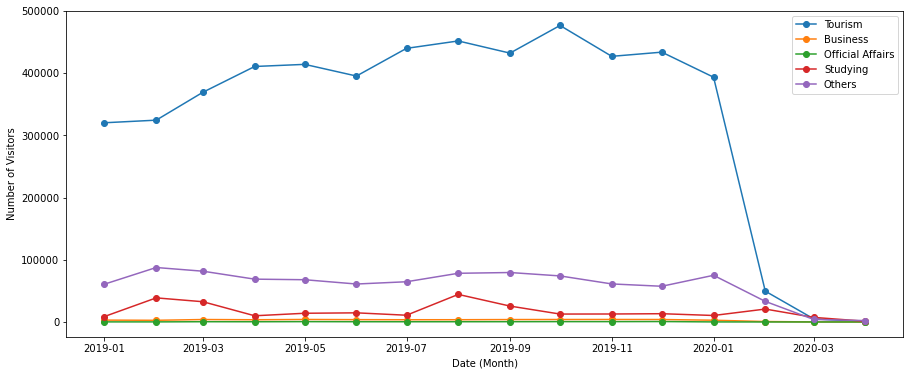

,tourism,business,official_affairs,studying,others
date,,,,,
2019-01-01,320113,2993,138,8793,60777
2019-02-01,324291,2694,143,38731,87520
2019-03-01,369165,3933,414,32532,81579
2019-04-01,410542,3575,362,9959,68812
2019-05-01,413949,4034,534,14003,67893
2019-06-01,395196,3743,399,14680,60989
2019-07-01,439699,3587,356,10847,64643
2019-08-01,451570,3625,388,44291,78238
2019-09-01,432018,3873,447,25545,79467


In [4]:
# Remove irrelevant columns
df_purpose_china = df_purpose_china.drop(columns=['nation', 'visitor', 'growth', 'share'])

# Rename columns for data analysis purpose
df_purpose_china = df_purpose_china.rename(columns = {"official affairs":"official_affairs"})

# Set date as an index for time-series analysis
df_purpose_china = df_purpose_china.set_index('date')

# Plot the no. of visitors from China according to their purpose of visit
fig, ax=plt.subplots(figsize=(15,6))
ax.plot(df_purpose_china.tourism, marker="o", label="Tourism")
ax.plot(df_purpose_china.business, marker="o", label="Business")
ax.plot(df_purpose_china.official_affairs, marker="o", label="Official Affairs")
ax.plot(df_purpose_china.studying, marker="o", label="Studying")
ax.plot(df_purpose_china.others, marker="o", label="Others")
ax.set_xlabel("Date (Month)")
ax.set_ylabel("Number of Visitors")
ax.legend(loc=1)
plt.show()

df_purpose_china

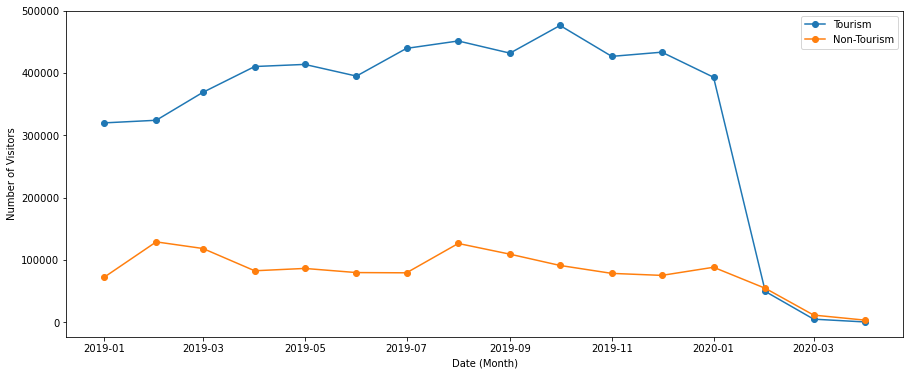

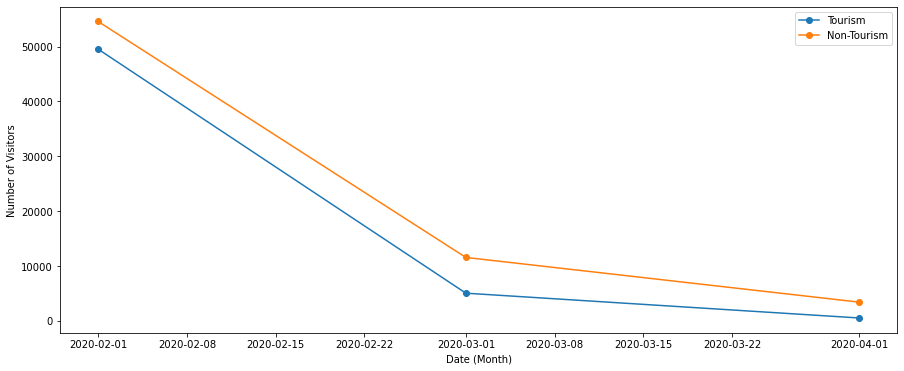

,tourism,non_tourism
date,,
2019-01-01,320113,72701
2019-02-01,324291,129088
2019-03-01,369165,118458
2019-04-01,410542,82708
2019-05-01,413949,86464
2019-06-01,395196,79811
2019-07-01,439699,79433
2019-08-01,451570,126542
2019-09-01,432018,109332


In [5]:
# Group the visitor data for 'business', 'official_affairs', 'studying' and 'others'  into 'non_tourism'
df_purpose_china['non_tourism'] = df_purpose_china['business'] + df_purpose_china['official_affairs'] + df_purpose_china['studying'] + df_purpose_china['others']
df_purpose_china = df_purpose_china.drop(columns=['business', 'official_affairs', 'studying', 'others'])

# Plot the no. of visitors from China according to their purpose of visit: 'tourism' & 'non_tourism'
fig, ax=plt.subplots(figsize=(15,6))
ax.plot(df_purpose_china.tourism, marker="o", label="Tourism")
ax.plot(df_purpose_china.non_tourism, marker="o", label="Non-Tourism")
ax.set_xlabel("Date (Month)")
ax.set_ylabel("Number of Visitors")
ax.legend(loc=1)
plt.show()

# Plot the no. of visitors from China in the year 2020 according to their purpose of visit: 'tourism' & 'non_tourism'
fig, ax=plt.subplots(figsize=(15,6))
ax.plot(df_purpose_china.tourism[13:], marker="o", label="Tourism")
ax.plot(df_purpose_china.non_tourism[13:], marker="o", label="Non-Tourism")
ax.set_xlabel("Date (Month)")
ax.set_ylabel("Number of Visitors")
ax.legend(loc=1)
plt.show()

df_purpose_china

### Time Series Forcasting using ARIMA

In [6]:
# Find p ,q, d parameter combinations for Seasonal ARIMA
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [7]:
# Visitor data for purpose 'tourism'
dfTourism = df_purpose_china['tourism']

# Training Dataset: Tourist data for the year 2019
train = dfTourism['2019-01-01':'2020-01-01']

# Find the optimal value of p, d, q for best ARIMA model
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:346.56391768865797
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:4.0
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2.0
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:27.24710013942077
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:6.0
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:312.84992578720943
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:6.0
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:34.90027025587474
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:8.0
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:262.9075392159796
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:4.0
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:2.0
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:4.0
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:4.0
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:6.0
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:4.0
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:6.0
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:240.21773604362392
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:6.0
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:4.0
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:6.0
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:6.0
ARIMA(0, 1,

In [8]:
# Fitting the ARIMA model on training data (2019 data) based on lowest AIC score
mod = sm.tsa.statespace.SARIMAX(train,
                                order=(0, 0, 0),
                                seasonal_order=(0, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                SARIMAX Results                                 
Dep. Variable:                  tourism   No. Observations:                   13
Model:             SARIMAX(0, 1, 0, 12)   Log Likelihood                   0.000
Date:                  Thu, 17 Dec 2020   AIC                              2.000
Time:                          00:15:01   BIC                               -inf
Sample:                      01-01-2019   HQIC                               nan
                           - 01-01-2020                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      4.124e+08         -0       -inf      0.000    4.12e+08    4.12e+08
Ljung-Box (L1) (Q):                    nan   Jarque-Bera (JB):                  nan
Prob(Q):                       

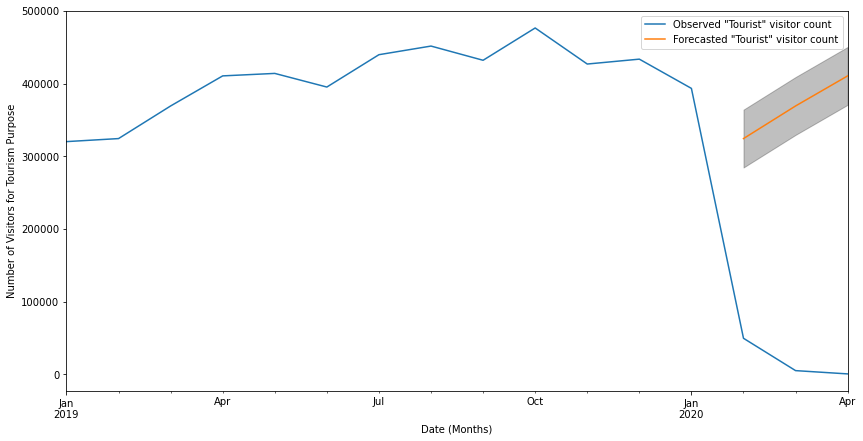

In [9]:
# Forcast 'tourist' visitor count for 2020
pred_uc = results.get_forecast(steps=3)
pred_ci = pred_uc.conf_int()
ax = dfTourism.plot(label='Observed "Tourist" visitor count', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecasted "Tourist" visitor count')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date (Months)')
ax.set_ylabel('Number of Visitors for Tourism Purpose')
plt.legend()
plt.show()

Mean absolute error (MAE) between expected and predicted values: 349638.667


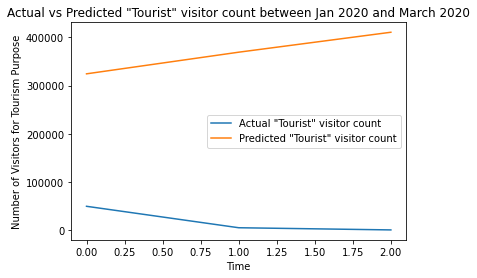

In [10]:
# Actual vs Predicted 'Tourist' visitor count between Jan 2020 and March 2020
dfTourism_true = df_purpose_china['tourism'][13:].values
dfTourism_pred = pred_uc.predicted_mean.values

# Calculate the mean absolute error between expected and predicted values
mae = mean_absolute_error(dfTourism_true, dfTourism_pred)
print('Mean absolute error (MAE) between expected and predicted values: %.3f' % mae)

# Plot the expected and predicted visitor count for 'Tourism' between Jan 2020 and March 2020
plt.plot(dfTourism_true, label='Actual "Tourist" visitor count')
plt.plot(dfTourism_pred, label='Predicted "Tourist" visitor count')
plt.xlabel('Time')
plt.ylabel('Number of Visitors for Tourism Purpose')
plt.title('Actual vs Predicted "Tourist" visitor count between Jan 2020 and March 2020');
plt.legend()
plt.show()

In [11]:
# Visitor data for purpose 'non_tourism'
dfNonTourism = df_purpose_china['non_tourism']

# Training Dataset: Tourist data for the year 2019
train = dfNonTourism['2019-01-01':'2020-01-01']

# Find the optimal value of p, d, q for best ARIMA model
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:311.7166749824875
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:4.0
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2.0
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:25.565342961729147
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:6.0
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:279.2330927092579
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:6.0
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:30.68141151577473
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:8.0
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:251.95972928696148
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:4.0
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:2.0
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:4.0
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:4.0
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:6.0
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:4.0
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:6.0
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:227.09184945166413
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:6.0
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:4.0
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:6.0
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:6.0
ARIMA(0, 1,

In [12]:
# Fitting the ARIMA model on training data (2019 data) based on lowest AIC score
mod = sm.tsa.statespace.SARIMAX(train,
                                order=(0, 0, 0),
                                seasonal_order=(0, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                SARIMAX Results                                 
Dep. Variable:              non_tourism   No. Observations:                   13
Model:             SARIMAX(0, 1, 0, 12)   Log Likelihood                   0.000
Date:                  Thu, 17 Dec 2020   AIC                              2.000
Time:                          00:15:04   BIC                               -inf
Sample:                      01-01-2019   HQIC                               nan
                           - 01-01-2020                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.883e+07         -0       -inf      0.000    1.88e+07    1.88e+07
Ljung-Box (L1) (Q):                    nan   Jarque-Bera (JB):                  nan
Prob(Q):                       

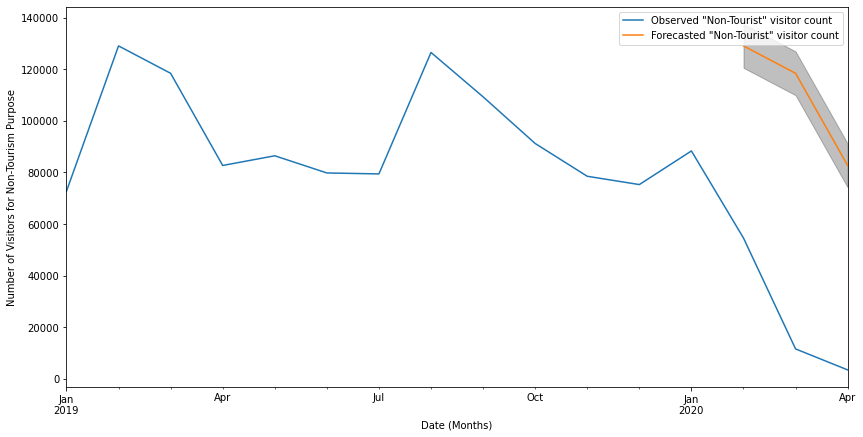

In [13]:
# Forcast 'non_tourist' visitor count for 2020
pred_uc = results.get_forecast(steps=3)
pred_ci = pred_uc.conf_int()
ax = dfNonTourism.plot(label='Observed "Non-Tourist" visitor count', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecasted "Non-Tourist" visitor count')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
plt.xlabel('Date (Months)')
plt.ylabel('Number of Visitors for Non-Tourism Purpose')
plt.legend()
plt.show()

Mean absolute error (MAE) between expected and predicted values: 86906.667


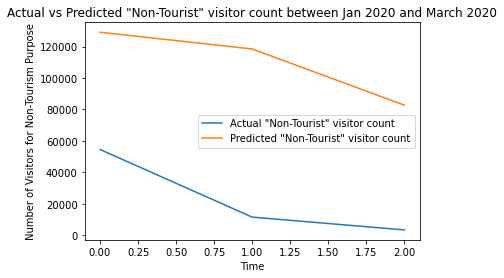

In [14]:
# Actual vs Predicted 'Non-Tourist' visitor count between Jan 2020 and March 2020
dfNonTourism_true = df_purpose_china['non_tourism'][13:].values
dfNonTourism_pred = pred_uc.predicted_mean.values

# Calculate the mean absolute error between expected and predicted values
mae = mean_absolute_error(dfNonTourism_true, dfNonTourism_pred)
print('Mean absolute error (MAE) between expected and predicted values: %.3f' % mae)

# Plot the expected and predicted visitor count for 'Tourism' between Jan 2020 and March 2020
plt.plot(dfNonTourism_true, label='Actual "Non-Tourist" visitor count')
plt.plot(dfNonTourism_pred, label='Predicted "Non-Tourist" visitor count')
plt.xlabel('Time')
plt.ylabel('Number of Visitors for Non-Tourism Purpose')
plt.title('Actual vs Predicted "Non-Tourist" visitor count between Jan 2020 and March 2020');
plt.legend()
plt.show()

### Time Series Modeling with Prophet

In [15]:
# Reset index and flatten dataset
df_purpose_china = df_purpose_china.reset_index()

# Training Dataset: Visitor data for the year 2019
df_purpose_china2019 = df_purpose_china[:13]
print(df_purpose_china2019)

# Prepare the dataset for modeling with Prophet
dfTourism = df_purpose_china2019.drop(columns=['non_tourism'])
dfTourism = dfTourism.rename(columns={'date': 'ds', 'tourism': 'y'})
print(dfTourism)

dfNonTourism = df_purpose_china2019.drop(columns=['tourism'])
dfNonTourism = dfNonTourism.rename(columns={'date': 'ds', 'non_tourism': 'y'})
print(dfNonTourism)

         date  tourism  non_tourism
0  2019-01-01   320113        72701
1  2019-02-01   324291       129088
2  2019-03-01   369165       118458
3  2019-04-01   410542        82708
4  2019-05-01   413949        86464
5  2019-06-01   395196        79811
6  2019-07-01   439699        79433
7  2019-08-01   451570       126542
8  2019-09-01   432018       109332
9  2019-10-01   476460        91235
10 2019-11-01   426849        78520
11 2019-12-01   433577        75300
12 2020-01-01   393336        88345
           ds       y
0  2019-01-01  320113
1  2019-02-01  324291
2  2019-03-01  369165
3  2019-04-01  410542
4  2019-05-01  413949
5  2019-06-01  395196
6  2019-07-01  439699
7  2019-08-01  451570
8  2019-09-01  432018
9  2019-10-01  476460
10 2019-11-01  426849
11 2019-12-01  433577
12 2020-01-01  393336
           ds       y
0  2019-01-01   72701
1  2019-02-01  129088
2  2019-03-01  118458
3  2019-04-01   82708
4  2019-05-01   86464
5  2019-06-01   79811
6  2019-07-01   79433
7  2019-08-0

In [16]:
# Forcast 'Tourist' visitor count
dfTourism_model = Prophet(interval_width=0.95)
dfTourism_model.fit(dfTourism)
dfTourism_forecast = dfTourism_model.make_future_dataframe(periods=3, freq='MS')
dfTourism_forecast = dfTourism_model.predict(dfTourism_forecast)

# Forcast 'Non-Tourist' visitor count
dfNonTourism_model = Prophet(interval_width=0.95)
dfNonTourism_model.fit(dfNonTourism)
dfNonTourism_forecast = dfNonTourism_model.make_future_dataframe(periods=3, freq='MS')
dfNonTourism_forecast = dfNonTourism_model.predict(dfNonTourism_forecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 9.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 9.


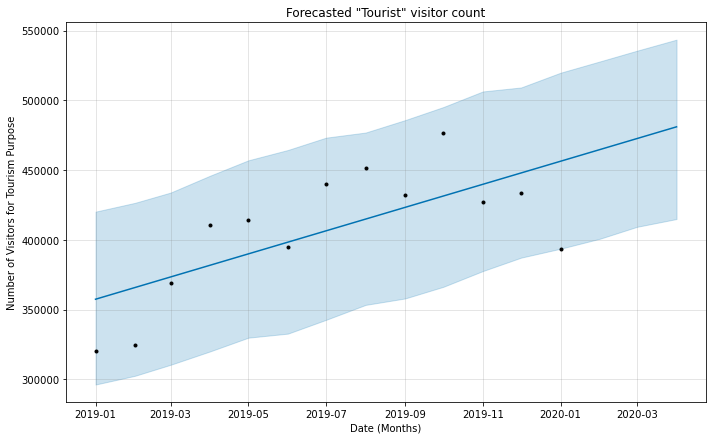

In [17]:
# Forecasted 'Tourist' visitor count
dfTourism_model.plot(dfTourism_forecast, xlabel = 'Date (Months)', ylabel = 'Number of Visitors for Tourism Purpose')
plt.title('Forecasted "Tourist" visitor count');

Mean absolute error (MAE) between expected and predicted values: 454415.307


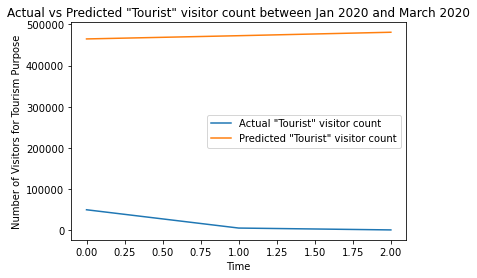

In [18]:
# Actual vs Predicted 'Tourist' visitor count between Jan 2020 and March 2020
dfTourism_true = df_purpose_china['tourism'][13:].values
dfTourism_pred = dfTourism_forecast['yhat'][13:].values

# Calculate the mean absolute error between expected and predicted values
mae = mean_absolute_error(dfTourism_true, dfTourism_pred)
print('Mean absolute error (MAE) between expected and predicted values: %.3f' % mae)

# Plot the expected and predicted 'Tourist' visitor count between Jan 2020 and March 2020
plt.plot(dfTourism_true, label='Actual "Tourist" visitor count')
plt.plot(dfTourism_pred, label='Predicted "Tourist" visitor count')
plt.xlabel('Time')
plt.ylabel('Number of Visitors for Tourism Purpose')
plt.title('Actual vs Predicted "Tourist" visitor count between Jan 2020 and March 2020');
plt.legend()
plt.show()

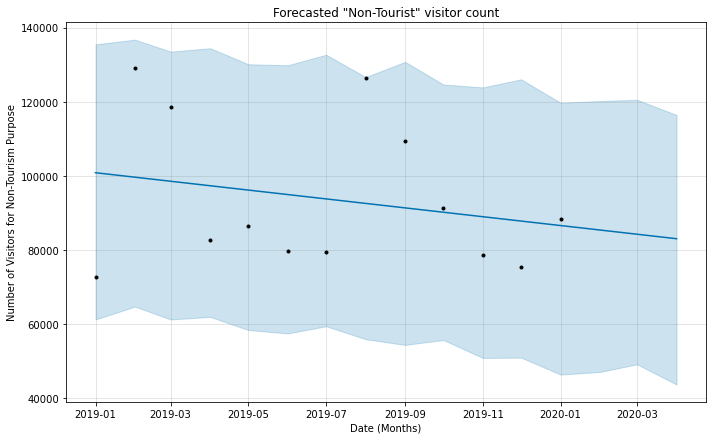

In [19]:
# Forecasted 'Non-Tourist' visitor count
dfNonTourism_model.plot(dfNonTourism_forecast, xlabel = 'Date (Months)', ylabel = 'Number of Visitors for Non-Tourism Purpose')
plt.title('Forecasted "Non-Tourist" visitor count');

Mean absolute error (MAE) between expected and predicted values: 61045.460


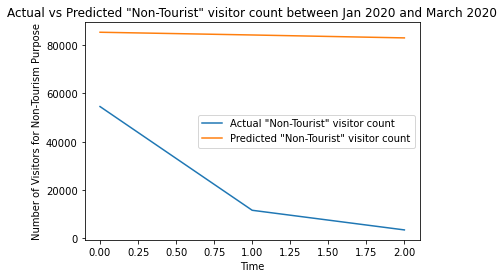

In [20]:
# Actual vs Predicted 'Non-Tourist' visitor count between Jan 2020 and March 2020
dfNonTourism_true = df_purpose_china['non_tourism'][13:].values
dfNonTourism_pred = dfNonTourism_forecast['yhat'][13:].values

# Calculate the mean absolute error between expected and predicted values
mae = mean_absolute_error(dfNonTourism_true, dfNonTourism_pred)
print('Mean absolute error (MAE) between expected and predicted values: %.3f' % mae)

# Plot the expected and predicted 'Non-Tourist' visitor count between Jan 2020 and March 2020
plt.plot(dfNonTourism_true, label='Actual "Non-Tourist" visitor count')
plt.plot(dfNonTourism_pred, label='Predicted "Non-Tourist" visitor count')
plt.xlabel('Time')
plt.ylabel('Number of Visitors for Non-Tourism Purpose')
plt.title('Actual vs Predicted "Non-Tourist" visitor count between Jan 2020 and March 2020');
plt.legend()
plt.show()